#선형회귀 : 보혐료 예측 모델

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error #루트 제곱 평균 오차
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [5]:
file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv"
data = pd.read_csv(file_url)
data.shape

(1338, 6)

In [6]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [8]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [9]:
round(data.describe(),2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [11]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
X = data[["age", "sex", "bmi", "children", "smoker"]]#독립변수
y = data["charges"] # 종속변수


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1070, 5) (268, 5) (1070,) (268,)


In [15]:
model = LinearRegression()


In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

# 모델 평가


In [20]:
print(type(y_pred),type(y_test))
print(y_pred.shape,y_test.shape)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
(268,) (268,)


In [21]:
comparsion = pd.DataFrame({"actual":y_test,"pred":y_pred})

In [29]:
y_test

12       1826.84300
306     20177.67113
318      7421.19455
815      1877.92940
157     15518.18025
           ...     
713      1984.45330
1282    14283.45940
531     14043.47670
537      8825.08600
1015    12124.99240
Name: charges, Length: 268, dtype: float64

In [28]:
round(comparsion.head(),2)

,actual,pred
12,1826.84,4765.25
306,20177.67,4957.73
318,7421.19,8298.99
815,1877.93,3078.81
157,15518.18,24165.96


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='actual', ylabel='pred'>

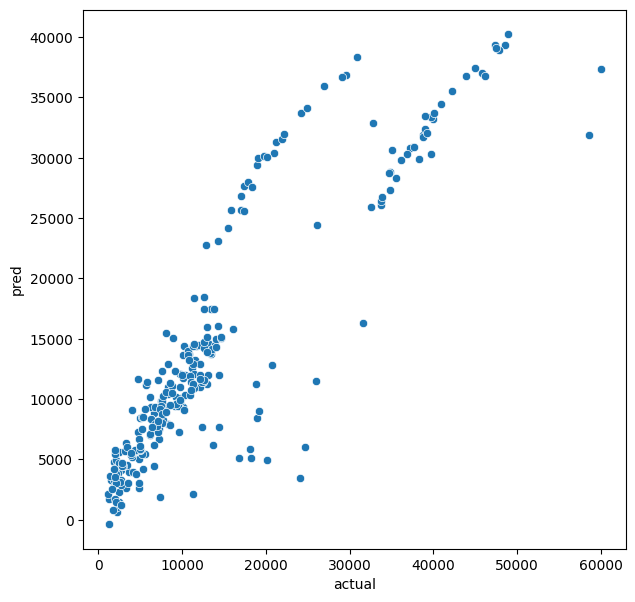

In [33]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="actual",y="pred",data=comparsion)

In [38]:
mean_squared_error(y_test,y_pred) ** 0.5

5684.927776334484

In [37]:
root_mean_squared_error(y_test,y_pred)

5684.927776334484

In [39]:
model.score(X_train,y_train)

0.7368220127747351

In [40]:
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [41]:
pd.Series(model.coef_,index=X.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [42]:
model.intercept_

np.float64(-11576.99997611237)